In [1]:
import os
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data = pd.read_csv(os.path.join('..', 'data', 'Output_10.csv'), encoding='GBK')

In [3]:
data.head()

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests
0,Afghanistan,All,AF01.07.2020,01.07.2020,b,0,10,169.0,0.0,NaN
1,Afghanistan,All,AF01.07.2020,01.07.2020,b,10,10,1525.0,5.0,NaN
2,Afghanistan,All,AF01.07.2020,01.07.2020,b,20,10,7948.0,18.0,NaN
3,Afghanistan,All,AF01.07.2020,01.07.2020,b,30,10,7592.0,54.0,NaN
4,Afghanistan,All,AF01.07.2020,01.07.2020,b,40,10,5362.0,117.0,NaN


In [4]:
data.Date = pd.to_datetime(data.Date, format='%d.%m.%Y')

In [5]:
data.head()

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests
0,Afghanistan,All,AF01.07.2020,2020-07-01,b,0,10,169.0,0.0,NaN
1,Afghanistan,All,AF01.07.2020,2020-07-01,b,10,10,1525.0,5.0,NaN
2,Afghanistan,All,AF01.07.2020,2020-07-01,b,20,10,7948.0,18.0,NaN
3,Afghanistan,All,AF01.07.2020,2020-07-01,b,30,10,7592.0,54.0,NaN
4,Afghanistan,All,AF01.07.2020,2020-07-01,b,40,10,5362.0,117.0,NaN


In [27]:
data_cpy = data.copy(deep=True)

age_grp = {0: '0-10',
          10: '10-20',
          20: '20-30',
          30: '30-40',
          40: '40-50',
          50: '50-60',
          60: '60-70',
          70: '70-80',
          80: '80-90',
          90: '90-100',
          100: '100+'}

data_cpy.Age = data_cpy.Age.map(age_grp)

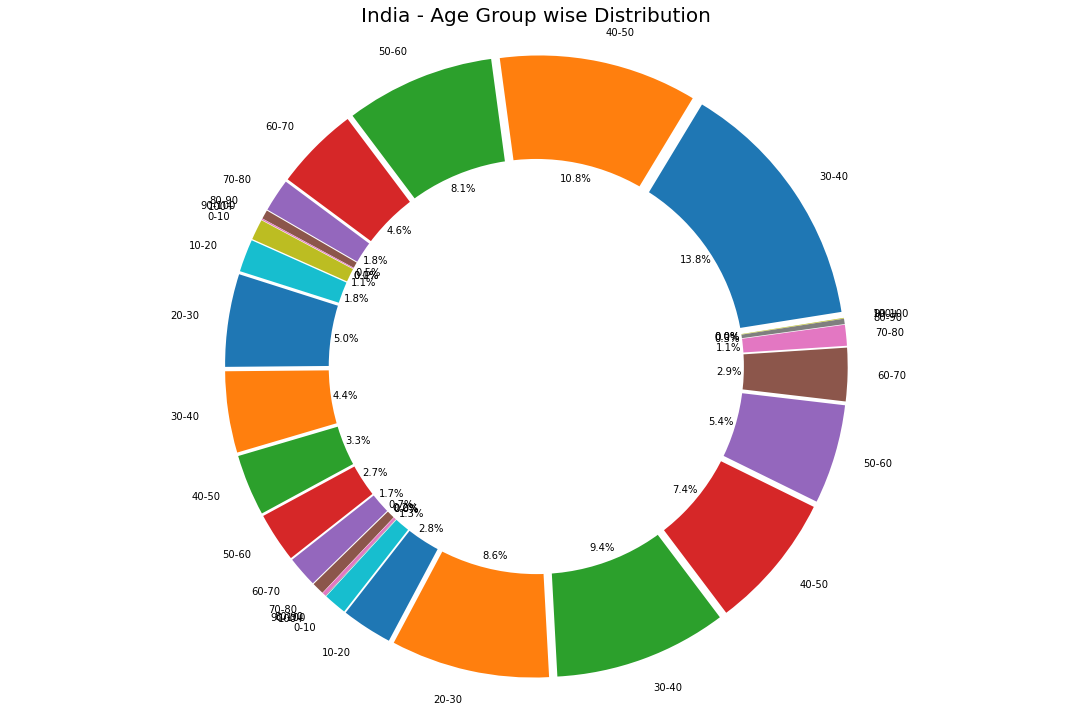

In [28]:
import matplotlib.pyplot as plt

labels = list(data_cpy[data_cpy.Country=='India']['Age'].iloc[-30:])
sizes = list(data_cpy[data_cpy.Country=='India']['Cases'].iloc[-30:])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [29]:
from datetime import date

today = date.today()

In [30]:
# fig = px.pie(data_cpy[data_cpy.Date>pd.to_datetime(date.today())-pd.to_timedelta(7, unit='d')], values='New Cases', names='Sex', title='Population of European continent')
# fig.show()

ValueError: Value of 'values' is not the name of a column in 'data_frame'. Expected one of ['Country', 'Region', 'Code', 'Date', 'Sex', 'Age', 'AgeInt', 'Cases', 'Deaths', 'Tests'] but received: New Cases

In [ ]:
data_cpy.Date>pd.to_datetime(date.today())-pd.to_timedelta(7, unit='d')

In [ ]:
data_cpy.Country.unique()

In [ ]:
fig = px.pie(data_cpy[data_cpy.Country=='USA'][data_cpy.Date>=pd.to_datetime(date.today())-pd.to_timedelta(7, unit='d')], 
             values='New Cases', names='Age', 
             title='Population of European continent',
             hole=.6)
fig.show()

In [ ]:
data_cpy[data_cpy.Country=='Denmark'][data_cpy.Date>=pd.to_datetime(date.today())-pd.to_timedelta(7, unit='d')]

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
data_cpy[data_cpy.Country=='Denmark'][data_cpy.Date==pd.to_datetime(date.today())-pd.to_timedelta(1, unit='d')]

In [83]:
COUNTRY = 'USA'
REGION = 'Michigan'

data_cpy[(data_cpy.Country==COUNTRY) 
         & (data_cpy.Age=='0-10') 
         & (data_cpy.Date==pd.to_datetime('2021-07-04'))]

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests
4355021,USA,Arizona,US_AZ04.07.2021,2021-07-04,b,0-10,10,52429.9,5.7,325889.2
4429480,USA,New Jersey,US_NJ04.07.2021,2021-07-04,b,0-10,10,NaN,5.4,50709.0
4440293,USA,NYC,US_NYC04.07.2021,2021-07-04,b,0-10,10,42933.0,6.5,NaN
4461380,USA,Oregon,US_OR_04.07.2021,2021-07-04,b,0-10,10,10325.8,1.0,NaN
4477132,USA,Texas,US_TX04.07.2021,2021-07-04,b,0-10,10,1693.0,20.0,NaN
4487736,USA,Virginia,US_VA04.07.2021,2021-07-04,b,0-10,10,33339.6,1.0,NaN


In [84]:
max(data_cpy[data_cpy.Country==COUNTRY].Date)

Timestamp('2021-07-04 00:00:00')

In [85]:
l = list(set(data_cpy[data_cpy.Country==COUNTRY].Date))

In [86]:
l = np.sort(l)

In [87]:
data_cpy[(data_cpy.Country==COUNTRY) 
         & (data_cpy.Sex=='m') 
         & (data_cpy.Date==l[-3])]

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests
4407260,USA,Michigan,US_MI02.07.2021,2021-07-02,m,0-10,10,18245.5,2.0,NaN
4407261,USA,Michigan,US_MI02.07.2021,2021-07-02,m,10-20,10,51986.8,2.0,NaN
4407262,USA,Michigan,US_MI02.07.2021,2021-07-02,m,20-30,10,81176.7,56.1,NaN
4407263,USA,Michigan,US_MI02.07.2021,2021-07-02,m,30-40,10,67660.1,131.2,NaN
4407264,USA,Michigan,US_MI02.07.2021,2021-07-02,m,40-50,10,63257.0,363.7,NaN
4407265,USA,Michigan,US_MI02.07.2021,2021-07-02,m,50-60,10,66254.6,983.9,NaN
4407266,USA,Michigan,US_MI02.07.2021,2021-07-02,m,60-70,10,47830.0,2118.1,NaN
4407267,USA,Michigan,US_MI02.07.2021,2021-07-02,m,70-80,10,25107.2,3132.6,NaN
4407268,USA,Michigan,US_MI02.07.2021,2021-07-02,m,80-90,10,8479.2,2053.3,NaN
4407269,USA,Michigan,US_MI02.07.2021,2021-07-02,m,90-100,10,4805.6,1770.9,NaN


In [108]:
data_cpy.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Benin',
       'Bermuda', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Czechia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'England',
       'England and Wales', 'Equatorial Guinea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Faroe Islands', 'Finland', 'France', 'Gambia',
       'Germany', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Island of Jersey', 'Isle of Man', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Malawi', 'Maldives', 'Mali', 'Mauritania',
       'Mexico', 'Moldova', 'Montenegro'

In [89]:
data_cpy[data_cpy.Country=='USA'].Region.unique()

array(['Alabama', 'Alaska', 'All', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'NYC', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [90]:
data_cpy[(data_cpy.Country=='USA')
                 & (data_cpy.Region=='NYC')].sort_values('Date', axis=0)[-8:]

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests
4440297,USA,NYC,US_NYC04.07.2021,2021-07-04,b,40-50,10,115289.5,1064.4,NaN
4440298,USA,NYC,US_NYC04.07.2021,2021-07-04,b,50-60,10,121578.5,2892.7,NaN
4440299,USA,NYC,US_NYC04.07.2021,2021-07-04,b,60-70,10,88952.2,5628.4,NaN
4440300,USA,NYC,US_NYC04.07.2021,2021-07-04,b,70-80,10,57759.0,8719.1,NaN
4440301,USA,NYC,US_NYC04.07.2021,2021-07-04,b,80-90,10,25893.3,7820.7,NaN
4440302,USA,NYC,US_NYC04.07.2021,2021-07-04,b,90-100,10,2712.8,1551.5,NaN
4440294,USA,NYC,US_NYC04.07.2021,2021-07-04,b,10-20,10,63071.1,26.4,NaN
4440293,USA,NYC,US_NYC04.07.2021,2021-07-04,b,0-10,10,42933.0,6.5,NaN


In [91]:
data_cpy[(data_cpy.Country=='USA')
                 & (data_cpy.Age == '10-20')
                 & (data_cpy.Region=='NYC')
                 & (data_cpy.Sex=='b')].sort_values('Date', axis=0)

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests
4440646,USA,NYC,US_NYC07.03.2020,2020-03-07,b,10-20,10,NaN,NaN,13.4
4441713,USA,NYC,US_NYC14.03.2020,2020-03-14,b,10-20,10,NaN,NaN,396.1
4442791,USA,NYC,US_NYC21.03.2020,2020-03-21,b,10-20,10,NaN,NaN,1670.4
4442956,USA,NYC,US_NYC22.03.2020,2020-03-22,b,10-20,10,340.3,0.0,NaN
4443110,USA,NYC,US_NYC23.03.2020,2020-03-23,b,10-20,10,370.9,0.0,NaN
4443231,USA,NYC,US_NYC24.03.2020,2020-03-24,b,10-20,10,443.6,0.0,NaN
4443385,USA,NYC,US_NYC25.03.2020,2020-03-25,b,10-20,10,521.1,0.2,NaN
4443528,USA,NYC,US_NYC26.03.2020,2020-03-26,b,10-20,10,580.9,0.2,NaN
4443704,USA,NYC,US_NYC27.03.2020,2020-03-27,b,10-20,10,640.9,0.2,NaN
4443880,USA,NYC,US_NYC28.03.2020,2020-03-28,b,10-20,10,702.7,0.2,2538.1


In [92]:
REGION

'Michigan'

In [93]:
df_b = {}
df_m = {}
df_f = {}

for key, val in age_grp.items():
    df_b[val] = data_cpy[(data_cpy.Country==COUNTRY)
                 & (data_cpy.Age == val)
                 & (data_cpy.Region==REGION)
                 & (data_cpy.Sex=='b')].sort_values('Date', axis=0)[-8:]
    
    df_m[val] = data_cpy[(data_cpy.Country==COUNTRY)
                 & (data_cpy.Age == val)
                 & (data_cpy.Region==REGION)
                 & (data_cpy.Sex=='m')].sort_values('Date', axis=0)[-8:]
    
    df_f[val] = data_cpy[(data_cpy.Country==COUNTRY)
                 & (data_cpy.Age == val)
                 & (data_cpy.Region==REGION)
                 & (data_cpy.Sex=='f')].sort_values('Date', axis=0)[-8:]
    
    ## ----------New Cases-----------------
    df_b[val].Cases = round(df_b[val].Cases.ffill().copy())
    df_b[val]['New Cases'] = df_b[val]['Cases'] - df_b[val]['Cases'].shift(1)
    df_b[val]['New Cases'] = df_b[val]['New Cases'].where(df_b[val]['New Cases']>0, 0)
    
    df_m[val].Cases = round(df_m[val].Cases.ffill().copy())
    df_m[val]['New Cases'] = df_m[val].Cases - df_m[val].Cases.shift(1)
    df_m[val]['New Cases'] = df_m[val]['New Cases'].where(df_m[val]['New Cases']>0, 0)
    
    df_f[val].Cases = round(df_f[val].Cases.ffill().copy())
    df_f[val]['New Cases'] = df_f[val].Cases - df_f[val].Cases.shift(1)
    df_f[val]['New Cases'] = df_f[val]['New Cases'].where(df_f[val]['New Cases']>0, 0)
    
    ## ----------New Deaths-----------------
    df_b[val].Deaths = round(df_b[val].Deaths.ffill().copy())
    df_b[val]['New Deaths'] = df_b[val]['Deaths'] - df_b[val]['Deaths'].shift(1)
    df_b[val]['New Deaths'] = df_b[val]['New Deaths'].where(df_b[val]['New Deaths']>0, 0)
    
    df_m[val].Deaths = round(df_m[val].Deaths.ffill().copy())
    df_m[val]['New Deaths'] = df_m[val].Deaths - df_m[val].Deaths.shift(1)
    df_m[val]['New Deaths'] = df_m[val]['New Deaths'].where(df_m[val]['New Deaths']>0, 0)
    
    df_f[val].Deaths = round(df_f[val].Deaths.ffill().copy())
    df_f[val]['New Deaths'] = df_f[val].Deaths - df_f[val].Deaths.shift(1)
    df_f[val]['New Deaths'] = df_f[val]['New Deaths'].where(df_f[val]['New Deaths']>0, 0)

In [110]:
pd.concat([df_m[AGE_GRP][-7:], df_f[AGE_GRP][-7:]], axis=0)

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests,New Cases,New Deaths
4414676,USA,Michigan,US_MI23.06.2021,2021-06-23,m,20-30,10,81080.0,NaN,NaN,11.0,0.0
4415028,USA,Michigan,US_MI24.06.2021,2021-06-24,m,20-30,10,81094.0,56.0,NaN,14.0,0.0
4415347,USA,Michigan,US_MI25.06.2021,2021-06-25,m,20-30,10,81095.0,56.0,NaN,1.0,0.0
4416172,USA,Michigan,US_MI28.06.2021,2021-06-28,m,20-30,10,81106.0,56.0,NaN,11.0,0.0
4416590,USA,Michigan,US_MI29.06.2021,2021-06-29,m,20-30,10,81128.0,56.0,NaN,22.0,0.0
4406976,USA,Michigan,US_MI01.07.2021,2021-07-01,m,20-30,10,81168.0,56.0,NaN,40.0,0.0
4407262,USA,Michigan,US_MI02.07.2021,2021-07-02,m,20-30,10,81177.0,56.0,NaN,9.0,0.0
4414665,USA,Michigan,US_MI23.06.2021,2021-06-23,f,20-30,10,88482.0,NaN,NaN,30.0,0.0
4415017,USA,Michigan,US_MI24.06.2021,2021-06-24,f,20-30,10,88506.0,39.0,NaN,24.0,0.0
4415336,USA,Michigan,US_MI25.06.2021,2021-06-25,f,20-30,10,88515.0,39.0,NaN,9.0,0.0


In [95]:
AGE_GRP = '20-30'

fig = px.pie(pd.concat([df_m[AGE_GRP][-7:], df_f[AGE_GRP][-7:]], axis=0), 
             values='New Cases', names='Sex', 
             title='Age, Gender and New Cases Plot',
             hole=.6)
fig.show()

In [96]:
all_age = pd.DataFrame(columns=['Country', 'Region', 'Code', 
                                'Date', 'Sex', 'Age', 
                                'AgeInt', 'Cases', 'Deaths', 
                                'Tests', 'New Cases'])
for key, val in age_grp.items():
    all_age = pd.concat([all_age, df_m[val][-7:], df_f[val][-7:]], axis=0)
    
fig = px.pie(all_age, 
             values='New Cases', names='Age', 
             title='Age and New Cases Plot',
             hole=.6)
fig.show()

In [109]:
all_age

,Country,Region,Code,Date,Sex,Age,AgeInt,Cases,Deaths,Tests,New Cases,New Deaths
4414652,USA,Michigan,US_MI23.06.2021,2021-06-23,b,0-10,10,35182.0,NaN,NaN,10.0,0.0
4415004,USA,Michigan,US_MI24.06.2021,2021-06-24,b,0-10,10,35191.0,4.0,NaN,9.0,0.0
4415323,USA,Michigan,US_MI25.06.2021,2021-06-25,b,0-10,10,35196.0,4.0,NaN,5.0,0.0
4416148,USA,Michigan,US_MI28.06.2021,2021-06-28,b,0-10,10,35213.0,4.0,NaN,17.0,0.0
4416566,USA,Michigan,US_MI29.06.2021,2021-06-29,b,0-10,10,35226.0,4.0,NaN,13.0,0.0
4406952,USA,Michigan,US_MI01.07.2021,2021-07-01,b,0-10,10,35244.0,4.0,NaN,18.0,0.0
4407238,USA,Michigan,US_MI02.07.2021,2021-07-02,b,0-10,10,35260.0,4.0,NaN,16.0,0.0
4414653,USA,Michigan,US_MI23.06.2021,2021-06-23,b,10-20,10,106818.0,NaN,NaN,29.0,0.0
4415005,USA,Michigan,US_MI24.06.2021,2021-06-24,b,10-20,10,106836.0,6.0,NaN,18.0,0.0
4415324,USA,Michigan,US_MI25.06.2021,2021-06-25,b,10-20,10,106842.0,6.0,NaN,6.0,0.0


In [98]:
all_age = pd.DataFrame(columns=['Country', 'Region', 'Code', 
                                'Date', 'Sex', 'Age', 
                                'AgeInt', 'Cases', 'Deaths', 
                                'Tests', 'New Cases'])
for key, val in age_grp.items():
    all_age = pd.concat([all_age, df_b[val][-7:]], axis=0)
    
fig = px.pie(all_age, 
             values='New Cases', names='Age', 
             title='Age and New Cases Plot',
             hole=.6)
fig.show()

In [26]:
https://api.globalhealth5050.org/api/v1/summary

SyntaxError: invalid syntax (<ipython-input-26-95927c7d55c2>, line 1)

In [107]:
import os
import json
import numpy as np
import pandas as pd
import plotly.express as px
import plotly
import requests
import zipfile


class AgeGender:
    def __init__(self, fetch=False):
        if fetch:
            zip_file = requests.get('https://osf.io/43ucn/download')
            open('zip_file.zip', 'wb').write(zip_file.content)      # Save File
            with zipfile.ZipFile('zip_file', 'r') as zip_ref:       # Unzip
                zip_ref.extractall('data/')
            path = os.path.join('data', 'Data', 'Output_10.csv')
        else:
            path = os.path.join('..', 'data', 'Output_10.csv')

        self.data = pd.read_csv(path, encoding='GBK', skiprows=3)
        self.data.Date = pd.to_datetime(self.data.Date, format='%d.%m.%Y')
        self.age2grp()

    def age2grp(self, age_col='Age', age_grp=None):
        if age_grp:
            self.age_grp = age_grp
        else:
            self.age_grp = {0: '0-10',
                      10: '10-20',
                      20: '20-30',
                      30: '30-40',
                      40: '40-50',
                      50: '50-60',
                      60: '60-70',
                      70: '70-80',
                      80: '80-90',
                      90: '90-100',
                      100: '100+'}
        self.data[age_col] = self.data[age_col].map(self.age_grp)

    def split_data(self, COUNTRY, REGION):
        self.df_b = {}
        self.df_m = {}
        self.df_f = {}

        for key, val in age_grp.items():
            self.df_b[val] = self.data[(self.data.Country==COUNTRY)
                         & (self.data.Age == val)
                         & (self.data.Region==REGION)
                         & (self.data.Sex=='b')].sort_values('Date', axis=0)[-8:]

            self.df_m[val] = self.data[(self.data.Country==COUNTRY)
                         & (self.data.Age == val)
                         & (self.data.Region==REGION)
                         & (self.data.Sex=='m')].sort_values('Date', axis=0)[-8:]

            self.df_f[val] = self.data[(self.data.Country==COUNTRY)
                         & (self.data.Age == val)
                         & (self.data.Region==REGION)
                         & (self.data.Sex=='f')].sort_values('Date', axis=0)[-8:]

            ## ----------New Cases-----------------
            self.df_b[val].Cases = round(self.df_b[val].Cases.ffill().copy())
            self.df_b[val]['New Cases'] = self.df_b[val]['Cases'] - self.df_b[val]['Cases'].shift(1)
            self.df_b[val]['New Cases'] = self.df_b[val]['New Cases'].where(self.df_b[val]['New Cases']>0, 0)

            self.df_m[val].Cases = round(self.df_m[val].Cases.ffill().copy())
            self.df_m[val]['New Cases'] = self.df_m[val].Cases - self.df_m[val].Cases.shift(1)
            self.df_m[val]['New Cases'] = self.df_m[val]['New Cases'].where(self.df_m[val]['New Cases']>0, 0)

            self.df_f[val].Cases = round(self.df_f[val].Cases.ffill().copy())
            self.df_f[val]['New Cases'] = self.df_f[val].Cases - self.df_f[val].Cases.shift(1)
            self.df_f[val]['New Cases'] = self.df_f[val]['New Cases'].where(self.df_f[val]['New Cases']>0, 0)

            ## ----------New Deaths-----------------
            self.df_b[val].Deaths = round(self.df_b[val].Deaths.ffill().copy())
            self.df_b[val]['New Deaths'] = self.df_b[val]['Deaths'] - self.df_b[val]['Deaths'].shift(1)
            self.df_b[val]['New Deaths'] = self.df_b[val]['New Deaths'].where(self.df_b[val]['New Deaths']>0, 0)

            self.df_m[val].Deaths = round(self.df_m[val].Deaths.ffill().copy())
            self.df_m[val]['New Deaths'] = self.df_m[val].Deaths - self.df_m[val].Deaths.shift(1)
            self.df_m[val]['New Deaths'] = self.df_m[val]['New Deaths'].where(self.df_m[val]['New Deaths']>0, 0)

            self.df_f[val].Deaths = round(self.df_f[val].Deaths.ffill().copy())
            self.df_f[val]['New Deaths'] = self.df_f[val].Deaths - self.df_f[val].Deaths.shift(1)
            self.df_f[val]['New Deaths'] = self.df_f[val]['New Deaths'].where(self.df_f[val]['New Deaths']>0, 0)

    def get_agegrp(self, AGE_GRP='20-30', title='Age, Gender and New Cases Plot', values='New Cases', convert2json=True):
        if ((self.df_m[AGE_GRP][-7:]['New Cases'].sum()==0) and
          (self.df_m[AGE_GRP][-7:]['New Deaths'].sum()==0)):
            # Change Title to No data found
            title = "No Data Available!"
        elif (self.df_m[AGE_GRP][-7:]['New Cases'].sum()==0):
            # Switch to Deaths
            title = 'Age, Gender and New Deaths Plot'
            values = 'New Deaths'
        else:
            # Keep New Cases
            values = 'New Cases'
        fig = px.pie(pd.concat([self.df_m[AGE_GRP][-7:], self.df_f[AGE_GRP][-7:]], axis=0), 
                     values=values, names='Sex', 
                     title=title,
                     hole=.6)
        if convert2json:
            graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
            return graphJSON

        return fig

    def get_ageplot(self, title='Age and New Cases Plot', values='New Cases', convert2json=True):
        all_age = pd.DataFrame(columns=['Country', 'Region', 'Code', 
                                        'Date', 'Sex', 'Age', 
                                        'AgeInt', 'Cases', 'Deaths', 
                                        'Tests', 'New Cases', 'New Deaths'])
        for key, val in self.age_grp.items():
            all_age = pd.concat([all_age, self.df_b[val][-7:]], axis=0)
            
        if ((all_age['New Cases'].sum()==0) and
          (all_age['New Deaths'].sum()==0)):
            # Change title to no data available
            title = "No Data Available!"
        elif (all_age['New Cases'].sum()==0):
            title = 'Age and New Deaths Plot'
            values = 'New Deaths'
        else:
            values = 'New Cases'
    
        fig = px.pie(all_age, 
                     values=values, names='Age', 
                     title=title,
                     hole=.6)
        if convert2json:
            graphJSON = json.dumps(fig, cls=plotly.utils.PlotlyJSONEncoder)
            return graphJSON

        return fig

if __name__ == '__main__':
    ag = AgeGender()
    ag.split_data('USA', 'Michigan')
    agegrpplt = ag.get_agegrp(AGE_GRP='20-30', convert2json=False)
    agegrpplt.show()

In [103]:
agegrpplt = ag.get_agegrp(AGE_GRP='10-20', convert2json=False)
agegrpplt.show()

In [104]:
ag.get_ageplot()

NameError: name 'calues' is not defined